<a href="https://colab.research.google.com/github/jjoud/Customer-Service-Project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install ucimlrepo pandas

In [ ]:
# Import the necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Load the dataset
ds = fetch_ucirepo(id=183)
df = pd.concat([ds.data.features, ds.data.targets], axis=1)
df.to_csv("communities_and_crime.csv", index=False)
print("Saved: communities_and_crime.csv")


Saved: communities_and_crime.csv


In [ ]:
df.head(10) # Display the first 10 rows of the dataset

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
5,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14
6,44,7,41500,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,0.05,0.08,0.06,?,?,?,?,0.00,?,0.03
7,6,?,?,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,0.01,0.33,0.00,?,?,?,?,0.00,?,0.55
8,21,?,?,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,0.04,0.17,0.04,?,?,?,?,0.00,?,0.53
9,29,?,?,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,0.00,0.47,0.11,?,?,?,?,0.00,?,0.15


##Data Preprocessing

here we'll analyze the data if there is any missing values or any data that need to be converted into another type of data

In [ ]:
# Replace all '?' entries with pd.NA to standardize missing values
# so Pandas can properly detect and handle them in later processing
df = df.replace('?', pd.NA)

<Axes: >

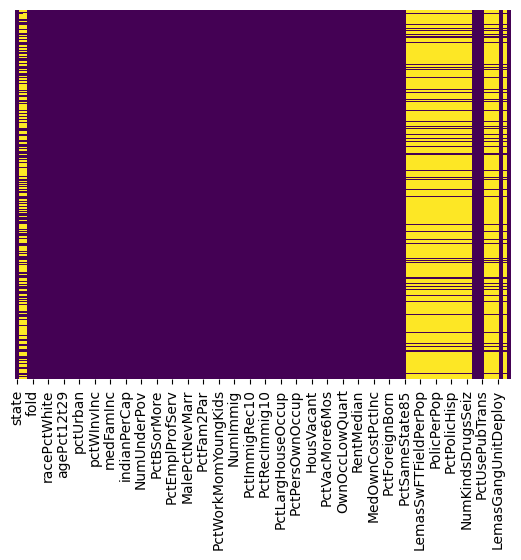

In [ ]:
# we noticed that we have many missing values, we used the heatmap function to identify missing values
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

but because we have 127 features, the heatmap function is not gonna work with our dataset

In [ ]:
#Separate ID/text columns from feature columns, then coerce feature values to numeric.
id_cols = ['state','county','community','communityname','fold']
num_cols = [c for c in df.columns if c not in id_cols]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

#we Build missing-data summary: percentage, absolute count,
#and dtype—sorted from worst to best—so you can scan top offenders instantly.
miss_pct = df.isna().mean().mul(100).sort_values(ascending=False)
rep_cols = pd.DataFrame({
    "missing_pct": miss_pct,                 # missing percentage
    "missing_count": df.isna().sum(),        # the number of the missing value
    "dtype": df.dtypes.astype(str)           # data tybe
}).sort_values("missing_pct", ascending=False)

#Map missingness to decide the actions
bins   = [0, 5, 30, 60, 100]
labels = [" (<5%)",
          "Review or drop (5–30%)",
          "Review or drop (30–60%)",
          "Drop (>60%)"]
rep_cols["suggest_action"] = pd.cut(rep_cols["missing_pct"],
                                    bins=bins, labels=labels, right=False)

rep_cols.to_csv("missing_report_by_column.csv")
rep_cols.head(30)

,missing_pct,missing_count,dtype,suggest_action
LemasPctPolicOnPatr,84.002006,1675,float64,Drop (>60%)
LemasGangUnitDeploy,84.002006,1675,float64,Drop (>60%)
LemasTotalReq,84.002006,1675,float64,Drop (>60%)
LemasTotReqPerPop,84.002006,1675,float64,Drop (>60%)
LemasSwornFT,84.002006,1675,float64,Drop (>60%)
LemasSwFTPerPop,84.002006,1675,float64,Drop (>60%)
LemasSwFTFieldPerPop,84.002006,1675,float64,Drop (>60%)
LemasSwFTFieldOps,84.002006,1675,float64,Drop (>60%)
NumKindsDrugsSeiz,84.002006,1675,float64,Drop (>60%)
OfficAssgnDrugUnits,84.002006,1675,float64,Drop (>60%)


we are gonna drop any features that's got <60% missing values, because they aren't very important and gonna be hard to fill

In [ ]:
#this code to delete them all quickly
threshold = 0.60  # 60%
missing_ratio = df.isna().mean()
drop_cols = missing_ratio[missing_ratio > threshold].index.tolist()
df = df.drop(columns=drop_cols)

print(f"Dropped {len(drop_cols)} columns (>60% missing).")

Dropped 22 columns (>60% missing).


we are gonna check the heatmap again to see if there is anything changes

<Axes: >

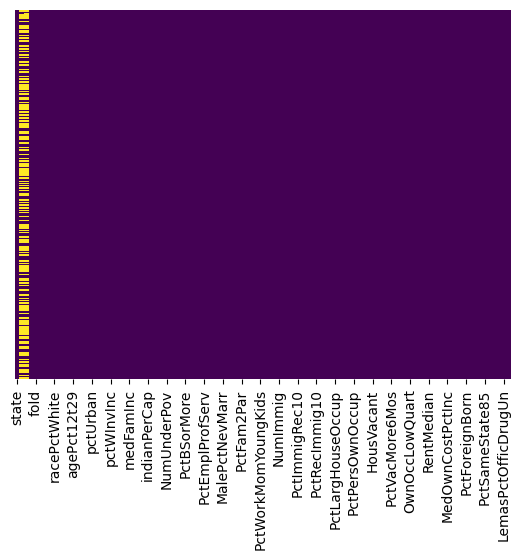

In [ ]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis') #used this function to identify missing values

we can't make sure which attribute that have the missing data so we are gonna see the report again to take actions for the lower percents missing data

In [ ]:
miss_pct = df.isna().mean().mul(100).sort_values(ascending=False)
rep_cols = pd.DataFrame({
    "missing_pct": miss_pct,                 # missing percentage
    "missing_count": df.isna().sum(),        # the number of the missing value
    "dtype": df.dtypes.astype(str)           # data tybe
}).sort_values("missing_pct", ascending=False)

bins   = [0, 5, 30, 60, 100]
labels = ["(<5%)",
          "Review or drop(5–30%)",
          "Review or drop (30–60%)",
          "Drop (>60%)"]
rep_cols["suggest_action"] = pd.cut(rep_cols["missing_pct"],
                                    bins=bins, labels=labels, right=False)

rep_cols.head(10)

,missing_pct,missing_count,dtype,suggest_action
community,59.027081,1177,object,Review or drop (30–60%)
county,58.876630,1174,object,Review or drop (30–60%)
OtherPerCap,0.050150,1,float64,(<5%)
HousVacant,0.000000,0,float64,(<5%)
HispPerCap,0.000000,0,float64,(<5%)
LemasPctOfficDrugUn,0.000000,0,float64,(<5%)
MalePctDivorce,0.000000,0,float64,(<5%)
MalePctNevMarr,0.000000,0,float64,(<5%)
LandArea,0.000000,0,float64,(<5%)
AsianPerCap,0.000000,0,float64,(<5%)


we don’t really need community or county as features because They’re IDs and have many missing values so we're going to drop them  

In [ ]:
df.drop(columns=['community','county'], inplace=True)

In [ ]:
#we are gonna drop the last missing value in OtherPerCap because its just one value and it wont affect our model
df.dropna(inplace=True) #drop the only row contains missing value

<Axes: >

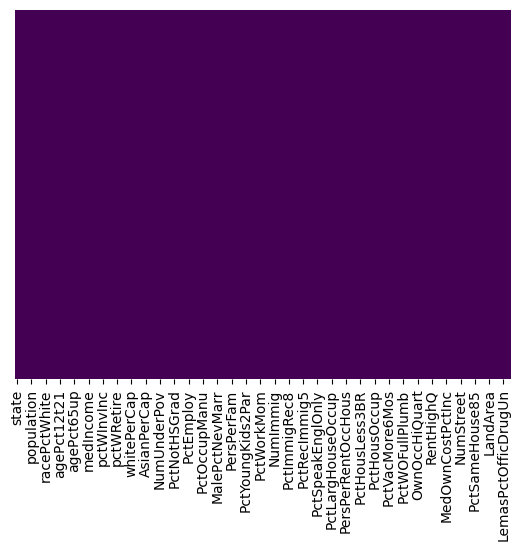

In [ ]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis') #cleanliness✨

In [ ]:
#check our report for the last time
miss_pct = df.isna().mean().mul(100).sort_values(ascending=False)
rep_cols = pd.DataFrame({
    "missing_pct": miss_pct,                 # missing percentage
    "missing_count": df.isna().sum(),        # the number of the missing value
    "dtype": df.dtypes.astype(str)           # data tybe
}).sort_values("missing_pct", ascending=False)

bins   = [0, 5, 30, 60, 100]
labels = ["(<5%)",
          "Review or drop(5–30%)",
          "Review or drop (30–60%)",
          "Drop (>60%)"]
rep_cols["suggest_action"] = pd.cut(rep_cols["missing_pct"],
                                    bins=bins, labels=labels, right=False)

rep_cols.head(10)

,missing_pct,missing_count,dtype,suggest_action
state,0.0,0,int64,(<5%)
communityname,0.0,0,object,(<5%)
fold,0.0,0,int64,(<5%)
population,0.0,0,float64,(<5%)
householdsize,0.0,0,float64,(<5%)
racepctblack,0.0,0,float64,(<5%)
racePctWhite,0.0,0,float64,(<5%)
racePctAsian,0.0,0,float64,(<5%)
racePctHisp,0.0,0,float64,(<5%)
agePct12t21,0.0,0,float64,(<5%)


In [ ]:
df.head(10)

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
5,6,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,0.25,0.31,...,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.00,0.14
6,44,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,0.02,0.30,...,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.00,0.03
7,6,Selmacity,1,0.01,0.74,0.03,0.46,0.20,1.00,0.52,...,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.00,0.55
8,21,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,0.00,0.38,...,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.00,0.53
9,29,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,0.03,0.90,...,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.00,0.15


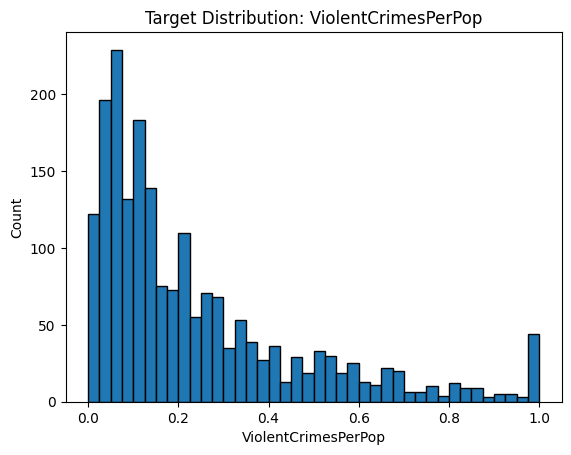

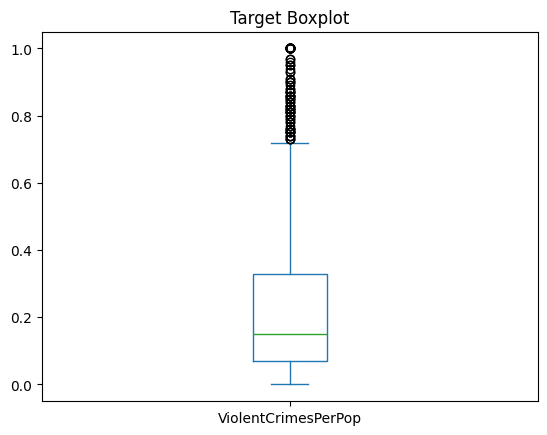

In [ ]:
import matplotlib.pyplot as plt

target = "ViolentCrimesPerPop"

plt.figure()
df[target].dropna().plot(kind="hist", bins=40, edgecolor="black")
plt.title("Target Distribution: ViolentCrimesPerPop")
plt.xlabel(target)
plt.ylabel("Count")
plt.show()

plt.figure()
df[target].dropna().plot(kind="box")
plt.title("Target Boxplot")
plt.show()

### Train-Test Split

We split our data into training (80%) and testing (20%) sets to train the models and then evaluate their performance on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#we drop the 'state', 'communityname', and 'fold' columns (identifiers and not features)
X = df.drop(columns=['state', 'communityname', 'fold', 'ViolentCrimesPerPop'])
y = df['ViolentCrimesPerPop']

#split the data (training and testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression Model

We trained a Linear Regression model to predict 'ViolentCrimesPerPop' based on the other features.

Linear Regression is a simple baseline model to understand feature relationships and compare against more complex models.

In [ ]:
#initialize and train model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

#predict on test
y_pred_lr = linear_reg_model.predict(X_test)

### Linear Regression Plot

This plot compares the actual 'ViolentCrimesPerPop' values (x-axis) with the Linear Regression model's predicted values (y-axis). The spread of points around the red line (ideal prediction) shows that the model's predictions vary from the actual values.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

#scatter plot (actual vs predicted)
fig = px.scatter(x=y_test, y=y_pred_lr, opacity=0.65,
                 labels={'x': 'Actual', 'y': 'Predicted'},
                 title='Actual vs. Predicted Violent Crimes Per Pop (Linear Regression)')

#regression line(ideal prediction)
fig.add_traces(go.Scatter(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()],
                           mode='lines', name='Ideal Prediction (y=x)', line=dict(color='red')))

fig.show()

### Random Forest Regression Model

We trained a Random Forest Regression model, an ensemble method using multiple decision trees, to predict 'ViolentCrimesPerPop'.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#initialize and train model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust n_estimators
random_forest_model.fit(X_train, y_train)

# predect on test
y_pred_rf = random_forest_model.predict(X_test)

### Random Forest Regression Plot

This plot compares actual vs. Random Forest predicted 'ViolentCrimesPerPop'. Points closer to the red line suggest better predictions than Linear Regression.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

#scatter plot(actual vs predicted)
fig = px.scatter(x=y_test, y=y_pred_rf, opacity=0.65,
                 labels={'x': 'Actual', 'y': 'Predicted'},
                 title='Actual vs. Predicted Violent Crimes Per Pop (Random Forest Regression)')

#regression line (ideal prediction)
fig.add_traces(go.Scatter(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()],
                           mode='lines', name='Ideal Prediction (y=x)', line=dict(color='red')))

fig.show()

### Ridge Regression Model

We trained a Ridge Regression model, a type of linear regression with regularization, to predict 'ViolentCrimesPerPop'. Regularization helps prevent overfitting by adding a penalty to the model's coefficients. We use it to see if it improves upon standard Linear Regression.

In [ ]:
from sklearn.linear_model import Ridge

# initialize and train model
#alpha parameter (regularization strength)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

#predect on test
y_pred_ridge = ridge_model.predict(X_test)

### Ridge Regression Plot

This plot shows actual vs. Ridge Regression predicted 'ViolentCrimesPerPop'. Observe how the points are scattered around the red line (ideal prediction) to see how Ridge Regression performs compared to the other models.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

#scatter plot (actual vs predicted)
fig = px.scatter(x=y_test, y=y_pred_ridge, opacity=0.65,
                 labels={'x': 'Actual', 'y': 'Predicted'},
                 title='Actual vs. Predicted Violent Crimes Per Pop (Ridge Regression)')

# regression line (ideal prediction)
fig.add_traces(go.Scatter(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()],
                           mode='lines', name='Ideal Prediction (y=x)', line=dict(color='red')))

fig.show()

### Model Comparison Plot

This plot shows the predicted 'ViolentCrimesPerPop' values vs. the actual values for all three models: Linear Regression (red), Random Forest (green), and Ridge Regression (blue).

*   The red dashed line represents ideal predictions (predicted = actual).
*   Points closer to this line indicate better model performance.
*   The Random Forest model (green points) appears to have predictions closest to the ideal line, suggesting it performed best among the three models.

In [ ]:
import plotly.graph_objects as go

#scatter plot for each model's (prediction vs actual)
fig = go.Figure()

fig.add_trace(go.Scattergl(
    x=y_test, y=y_pred_lr,
    mode='markers',
    name='Linear Regression Predictions',
    marker=dict(
        color='rgba(152, 0, 0, .8)',
        size=8,
        line=dict(
            color='rgba(152, 0, 0, 1)',
            width=1
        )
    )
))

fig.add_trace(go.Scattergl(
    x=y_test, y=y_pred_rf,
    mode='markers',
    name='Random Forest Regression Predictions',
    marker=dict(
        color='rgba(0, 152, 0, .8)',
        size=8,
        line=dict(
            color='rgba(0, 152, 0, 1)',
            width=1
        )
    )
))

fig.add_trace(go.Scattergl(
    x=y_test, y=y_pred_ridge,
    mode='markers',
    name='Ridge Regression Predictions',
    marker=dict(
        color='rgba(0, 0, 152, .8)',
        size=8,
        line=dict(
            color='rgba(0, 0, 152, 1)',
            width=1
        )
    )
))

#ideal prediction line (y=x)
fig.add_trace(go.Scatter(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()],
                           mode='lines', name='Ideal Prediction (y=x)', line=dict(color='red', dash='dash')))

fig.update_layout(
    title='Model Comparison: Actual vs. Predicted Violent Crimes Per Pop',
    xaxis_title='Actual',
    yaxis_title='Predicted',
    hovermode='closest'
)

fig.show()